<a href="https://colab.research.google.com/github/fjpa121197/DataScienceDM/blob/master/Project/results_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random #https://pynative.com/python-random-choice/
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#Load results from github repositary
df_all = pd.read_csv('https://raw.githubusercontent.com/fjpa121197/DataScienceDM/master/Project/results_all.csv')
df_mcts = pd.read_csv('https://raw.githubusercontent.com/fjpa121197/DataScienceDM/master/Project/results_mcts.csv')
df_trees = pd.read_csv('https://raw.githubusercontent.com/fjpa121197/DataScienceDM/master/Project/results_tree_tree.csv')

##FIRST ANALYSIS - MCTS default results

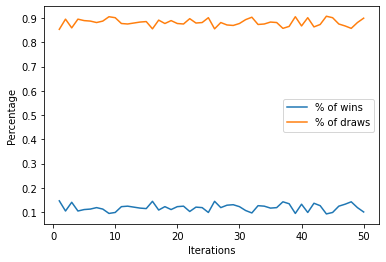

The mean number of ties (out of 500 games) is: 441
The mean number of times that an agent wins (out of 500 games) is 58


In [83]:
##Lets first take a look at the results using the default random choice in MCTS code
##We want to check how many wins we got (either player 1 or 2) and ties
df_mcts['win_percentage'] = (df_mcts['wins'])/(df_mcts['wins'] + df_mcts['ties'])
df_mcts['draw_percentage'] = (df_mcts['ties'])/(df_mcts['ties'] + df_mcts['wins'])

#print(df_mcts) #Uncomment to see dataframe

#Lets look at a graph to see the percentage of wins and ties
plt.plot(df_mcts.iteration,df_mcts.win_percentage)
plt.plot(df_mcts.iteration,df_mcts.draw_percentage)
plt.xlabel('Iterations')
plt.ylabel('Percentage')
plt.legend(['% of wins', '% of draws'], loc='best')
plt.savefig("graph_default_mcts.png")
plt.show()

mean_current_ties = np.mean(df_mcts.values.T[2])
mean_current_wins = np.mean(df_mcts.values.T[1])
print("The mean number of ties (out of 500 games) is: " + str(int(mean_current_ties)))
print("The mean number of times that an agent wins (out of 500 games) is " + str(int(mean_current_wins)))

In [0]:
##Define function to perform bootstrap. In lab 2, we make our own, so i will use that one here.
def bootstrap_mean_ci(sample,sample_size,n_iterations,ci):

  bst = np.empty(shape=(n_iterations,sample_size))#create a (n_iterations x sample_size array)
  #randomly filled the arrays
  for x in range(n_iterations):
    for y in range(sample_size):
      bst[x][y] = random.choice(sample)
  #Get the mean of each sample
  data_mean_all = []
  for x in range(bst.shape[0]):
    data_mean_all.append(np.mean(bst[x]))
    
  data_mean_all = np.sort(data_mean_all)
  data_mean = np.mean(data_mean_all)

  percentile_low = np.percentile(data_mean_all,((100-ci)/2))
  percentile_high = np.percentile(data_mean_all,(100-((100-ci)/2)))

  last_array= np.where(data_mean_all > percentile_low,data_mean_all,-1)
  last_array = np.where(last_array < percentile_high,last_array,-1)
  last_array = np.sort(last_array)
  i = 0
  while i > -1:
    if last_array[i] != -1:
      lower = last_array[i]
      break
    i += 1
  upper = last_array[-1]

  data_mean = 0
  count = 0
  for idx,x in enumerate(last_array):
    if last_array[idx] != -1:
      count += 1
      data_mean = data_mean + last_array[idx]

  data_mean = data_mean/count

  return data_mean,lower,upper

In [49]:
##It is quite obvious that for every iteration 1-50, out of the 500 games played, the majority of time, the result would end up in a draw.
##But lets perform bootstrap to be confident about this assumption, and prove that using the default MCTS algorithm does not make an agent expert in game.
##The values taken to perform bootstrap will be the number of ties.

data_bootstrap = df_mcts.values.T[2]
#Bootstrap for current number of ties
current_mean,current_lower,current_upper = bootstrap_mean_ci(data_bootstrap,data_bootstrap.shape[0],100000,90)
print("The mean for number of ties (after 500 games): "+ str(int(current_mean)))
print("The lower bound for number of ties (after 500 games): " + str(int(current_lower)))
print("The upper bound for number of ties (after 500 games): " + str(int(current_upper)))

The mean for number of ties (after 500 games): 441
The lower bound for number of ties (after 500 games): 439
The upper bound for number of ties (after 500 games): 442


Now, we can say that within a 90% confidence interval, out of 500 games using default MCTS as agent for each player, the mean number of draws will be 441.
And with an upper and lower bound number of ties of 442,439 respectively.

##Second Analysis, check if draws using the decision trees are less than using default MCTS

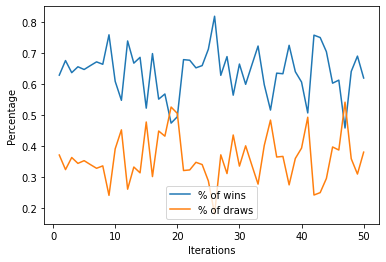

The mean number of ties (out of 500 games) is: 163
The mean number of times that an agent wins (out of 500 games) is 336
The mean for number of ties (after 500 games): 163
The lower bound for number of ties (after 500 games): 155
The upper bound for number of ties (after 500 games): 171


In [123]:
#Combine the number of wins, loss,ties of classifier (10) vs classifier (1-10) and so on.
aggregation_functions = {'wins': 'sum', 'loss': 'sum', 'ties': 'sum'}
df_new_trees = df_trees.groupby(df_trees['latest classifier']).aggregate(aggregation_functions)
df_new_trees['wins_losses'] = df_new_trees['wins'] + df_new_trees['loss']
#print(df_new_trees)

##We want to check how many wins we got (either player 1 or 2) and ties
df_new_trees['win_percentage'] = (df_new_trees['wins'])/(df_new_trees['wins'] + df_new_trees['ties'])
df_new_trees['draw_percentage'] = (df_new_trees['ties'])/(df_new_trees['ties'] + df_new_trees['wins'])

#print(df_new_trees) #Uncomment to see dataframe

#Lets look at a graph to see the percentage of wins and ties
plt.plot(np.arange(1,51,1),df_new_trees.win_percentage)
plt.plot(np.arange(1,51,1),df_new_trees.draw_percentage)
plt.xlabel('Iterations')
plt.ylabel('Percentage')
plt.legend(['% of wins', '% of draws'], loc='best')
plt.savefig("graph_tree_tree.png")
plt.show()

mean_current_ties = np.mean(df_new_trees.values.T[2])
mean_current_wins = np.mean(df_new_trees.values.T[3])
print("The mean number of ties (out of 500 games) is: " + str(int(mean_current_ties)))
print("The mean number of times that an agent wins (out of 500 games) is " + str(int(mean_current_wins)))

data_bootstrap = df_new_trees.values.T[2]
#Bootstrap for current number of ties
current_mean,current_lower,current_upper = bootstrap_mean_ci(data_bootstrap,data_bootstrap.shape[0],100000,90)
print("The mean for number of ties (after 500 games): "+ str(int(current_mean)))
print("The lower bound for number of ties (after 500 games): " + str(int(current_lower)))
print("The upper bound for number of ties (after 500 games): " + str(int(current_upper)))


In [0]:
##Lets perform a permutation test to see if the numbers of wins are significantly higher than using default MCTS, it looks like it is, but lets 
##make it is using statistics. I will also use a function made during Lab 2 that does this test.

def permutation_test(data_1,data_2,n_permutations):
  t_obs = np.mean(data_2) - np.mean(data_1)
  count = 0
  for x in range(n_permutations):
    concat = np.concatenate((data_1,data_2))
    perm = np.random.permutation(concat)
    pold = perm[:int(len(data_1))-1]
    pnew = perm[int(len(data_1)):]
   
    t_perm = np.mean(pnew)- np.mean(pold)
    if t_perm > t_obs:
      count += 1

  p_value = count / n_permutations

  return p_value

In [69]:
p_value = permutation_test(df_mcts.values.T[1],df_new_trees.values.T[3],200000)
print(p_value)

0.0


##Third Analysis to see improvement of classifiers along iterations

In [0]:
for x in range(10,510,10):
  wins_tree = df_trees.loc[df_trees['latest classifier'] == x, 'wins'].values
  loss_tree = df_trees.loc[df_trees['latest classifier'] == x, 'loss'].values
  ties_tree = df_trees.loc[df_trees['latest classifier'] == x, 'ties'].values

  plt.plot(np.arange(1,11,1),wins_tree)
  plt.plot(np.arange(1,11,1),loss_tree)
  plt.plot(np.arange(1,11,1),ties_tree)
  plt.legend(['# of wins', '# of losses','# of ties'], loc='best')
  plt.xlabel('Classifier')
  plt.ylabel('# Games')
  plt.savefig("graph_classifier_%s.png" %x)
  plt.close() #If you uncomment the line below, comment this one
  #plt.show() #If you want to see all graphs being ploted, uncomment this line

In [122]:
##Run correlation test and see which cases the behaviour of wins is as expected
import scipy.stats
for x in range(10,510,10):
  wins_tree = df_trees.loc[df_trees['latest classifier'] == x, 'wins'].values
  correlation = scipy.stats.pearsonr(np.arange(1,11,1), wins_tree)
  print("For Iteration 1 (Classifier %s vs previous 10 agents):" %x)
  print(correlation)

For Iteration 1 (Classifier 10 vs previous 10 agents):
(-0.042082731807843235, 0.9081068781269088)
For Iteration 1 (Classifier 20 vs previous 10 agents):
(0.3167514084606957, 0.37254033240215023)
For Iteration 1 (Classifier 30 vs previous 10 agents):
(0.4168403863601293, 0.23076464680649522)
For Iteration 1 (Classifier 40 vs previous 10 agents):
(-0.29032944690379514, 0.41578422436265106)
For Iteration 1 (Classifier 50 vs previous 10 agents):
(-0.5692609868999985, 0.08586998969048239)
For Iteration 1 (Classifier 60 vs previous 10 agents):
(-0.15728140586693765, 0.6643323371199862)
For Iteration 1 (Classifier 70 vs previous 10 agents):
(0.745771051581364, 0.013269520191016614)
For Iteration 1 (Classifier 80 vs previous 10 agents):
(0.13373921960961416, 0.7126222235089891)
For Iteration 1 (Classifier 90 vs previous 10 agents):
(-0.154827256970119, 0.6693180420070645)
For Iteration 1 (Classifier 100 vs previous 10 agents):
(0.39785799524194676, 0.2548576894318515)
For Iteration 1 (Classif